In [12]:
import os
import numpy as np
from PIL import Image, ImageFile
from skimage import io
import matplotlib.pyplot as plt
import tifffile
from scipy import misc
from configparser import ConfigParser
from visualization import ids_to_greyscale, load_depth, show_bounding_boxes, load_stencil_ids, load_stencil_flags
import visualization
from matplotlib import patches, cm

In [7]:
ini_file = "gta-postprocessing.ini"
visualization.multi_page = False
visualization.ini_file = ini_file
visualization.use_cache = False

conn = visualization.get_connection()
cur = conn.cursor()

CONFIG = ConfigParser()
CONFIG.read(ini_file)
in_directory = r'D:\projekty\GTA-V-extractors\output'
visualization.in_directory = in_directory

In [14]:
def make_rgb_transparent(rgb, bg_rgb, alpha):
    # this is for plain python
    #return [alpha * c1 + (1 - alpha) * c2
    #        for (c1, c2) in zip(rgb, bg_rgb)]
    # this is for numpy
    return rgb * alpha + bg_rgb * (1 - alpha)

In [28]:
in_rgb_file = os.path.join(in_directory, '2018-05-24--21-43-47--596.png')
in_stencil_file = os.path.join(in_directory, '2018-05-24--21-43-47--596-stencil.png')
stencil_ids = np.array(Image.open(in_stencil_file))
rgb = np.array(Image.open(in_rgb_file))


new_color = np.array(cm.viridis(1 * 25)[0:3]) * 255
old_color = rgb[stencil_ids == 0]
rgb[stencil_ids == 0] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)

new_color = np.array(cm.viridis(6 * 25)[0:3]) * 255
old_color = rgb[stencil_ids == 3]
rgb[stencil_ids == 3] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)

#new_color = np.array(cm.viridis(6 * 25)[0:3]) * 255
#old_color = rgb[stencil_ids == 4]
#rgb[stencil_ids == 4] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)


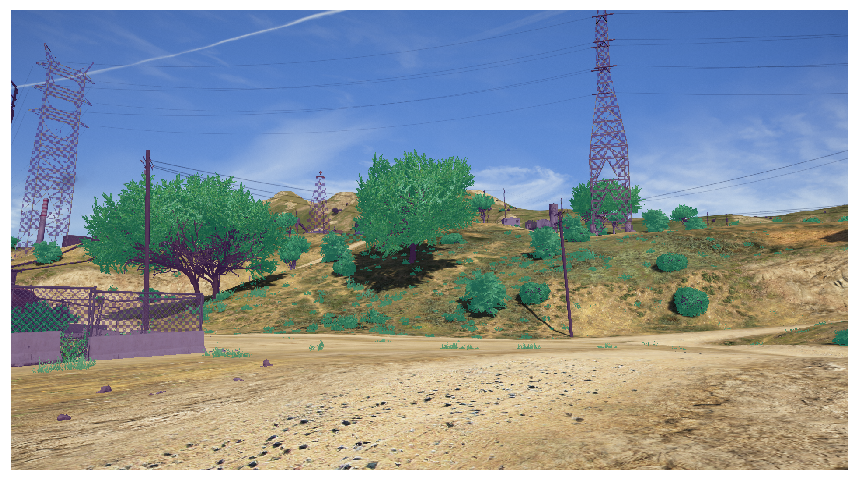

In [29]:

fig = plt.figure(figsize=(15, 15))
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off',
                labelright='off', labelbottom='off')
plt.imshow(rgb)
plt.show()

#plt.imshow(stencil_ids == 0, color='blue', alpha=.4)
#plt.imshow(stencil_ids == 3, color='red', alpha=.2)
#plt.imshow(stencil_ids == 4, color='red', alpha=.2)


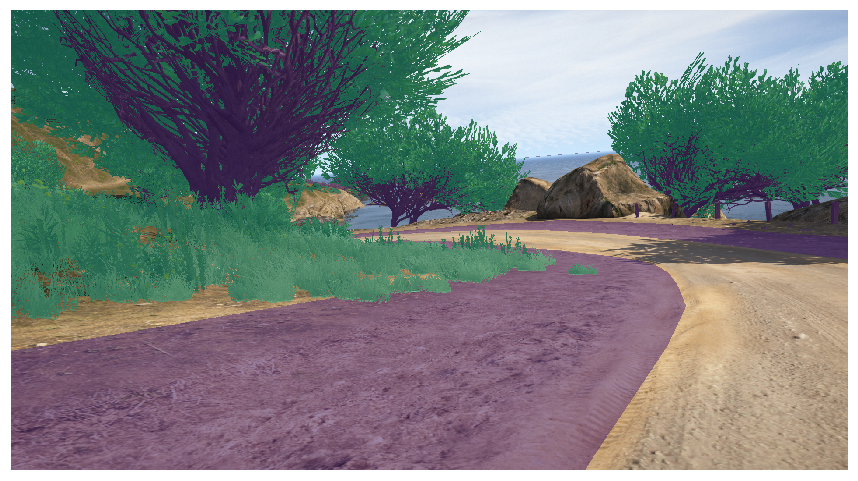

In [30]:
in_rgb_file = os.path.join(in_directory, '2018-05-24--22-00-14--770.png')
in_stencil_file = os.path.join(in_directory, '2018-05-24--22-00-14--770-stencil.png')
stencil_ids = np.array(Image.open(in_stencil_file))
rgb = np.array(Image.open(in_rgb_file))


new_color = np.array(cm.viridis(1 * 25)[0:3]) * 255
old_color = rgb[stencil_ids == 0]
rgb[stencil_ids == 0] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)

new_color = np.array(cm.viridis(6 * 25)[0:3]) * 255
old_color = rgb[stencil_ids == 3]
rgb[stencil_ids == 3] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)

#new_color = np.array(cm.viridis(6 * 25)[0:3]) * 255
#old_color = rgb[stencil_ids == 4]
#rgb[stencil_ids == 4] = make_rgb_transparent(rgb=new_color, bg_rgb=old_color, alpha=0.5)

fig = plt.figure(figsize=(15, 15))
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off',
                labelright='off', labelbottom='off')
plt.imshow(rgb)
plt.show()

#plt.imshow(stencil_ids == 0, color='blue', alpha=.4)
#plt.imshow(stencil_ids == 3, color='red', alpha=.2)
#plt.imshow(stencil_ids == 4, color='red', alpha=.2)
